In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/flood-prediction-dataset/flood.csv


In [2]:
import pandas as pd
file_path="/kaggle/input/flood-prediction-dataset/flood.csv"
df = pd.read_csv(file_path)
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [4]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [5]:
# Create our features (X) by dropping the column we want to predict
X = df.drop('FloodProbability', axis=1)
X

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,IneffectiveDisasterPreparedness,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors
0,3,8,6,6,4,4,6,2,3,2,5,10,7,4,2,3,4,3,2,6
1,8,4,5,7,7,9,1,5,5,4,6,9,2,6,2,1,1,9,1,3
2,3,10,4,1,7,5,4,7,4,9,2,7,4,4,8,6,1,8,3,6
3,4,4,2,7,3,4,1,4,6,4,9,4,2,6,6,8,8,6,6,10
4,3,7,5,2,5,8,5,2,7,5,7,7,6,5,3,3,4,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,3,7,4,7,5,9,4,6,10,4,4,7,3,8,8,6,1,5,4,2
49996,3,10,3,8,3,3,4,4,3,11,8,8,6,3,6,4,4,2,4,5
49997,4,4,5,7,2,1,4,5,6,7,7,4,6,4,1,5,1,6,4,3
49998,4,5,4,4,6,3,10,2,6,11,5,6,3,4,7,6,2,4,0,11


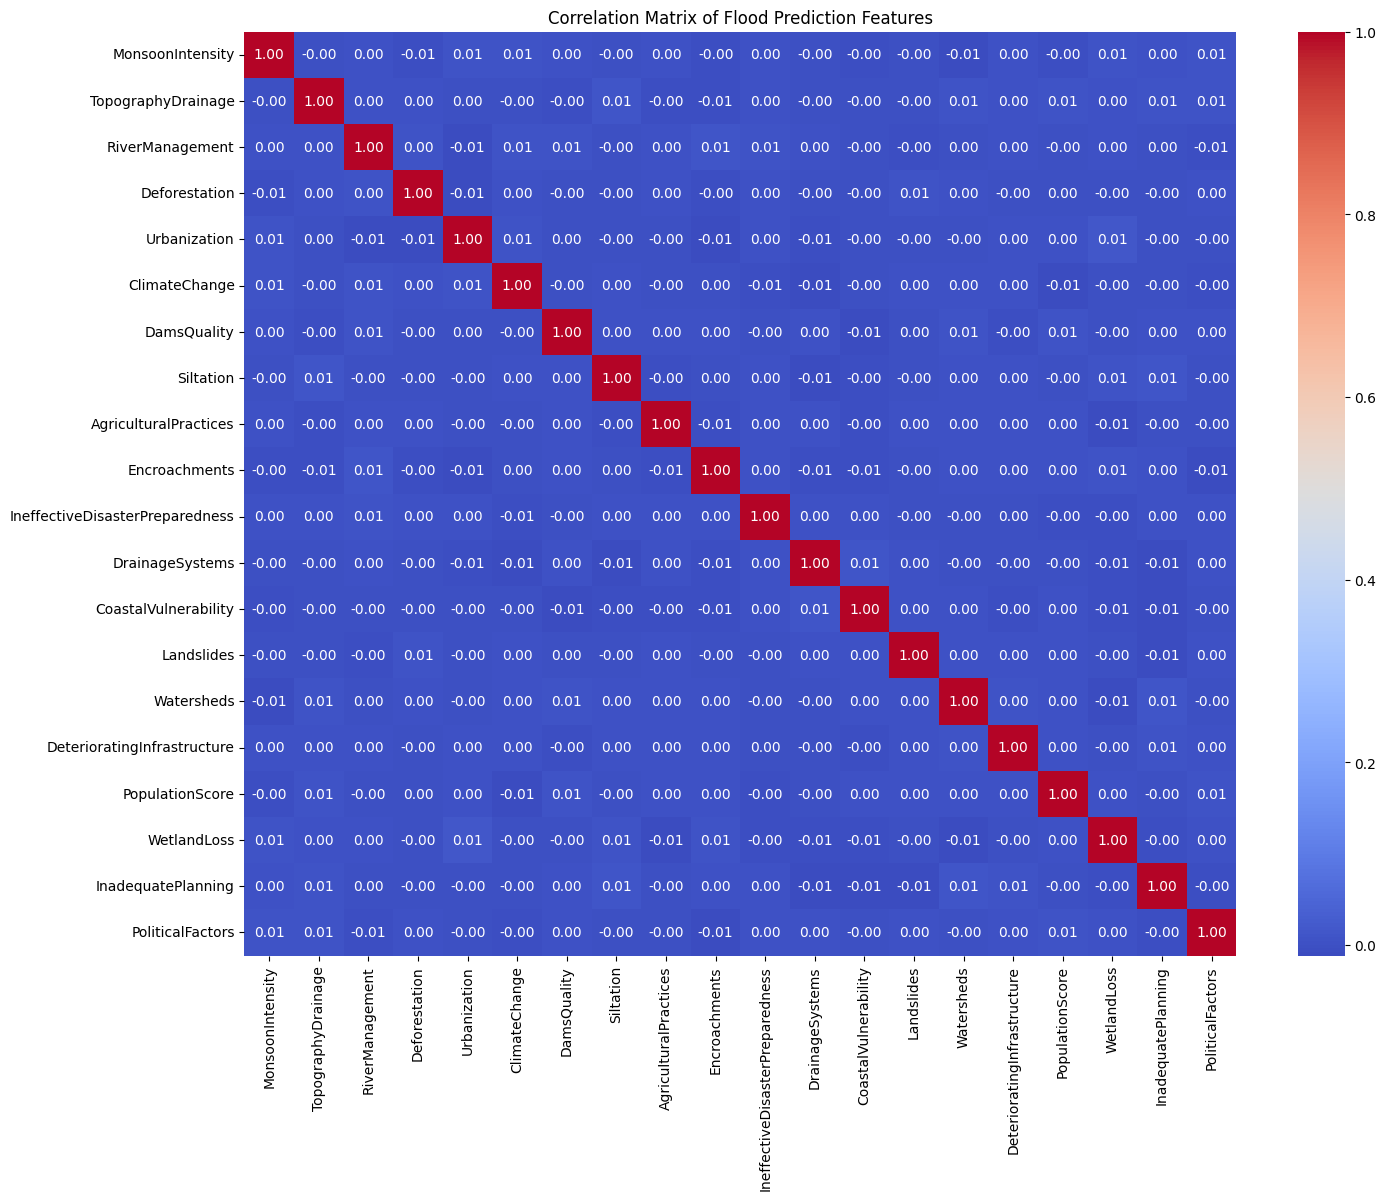

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix for all features
correlation_matrix = X.corr()

# Set up the plot size
plt.figure(figsize=(16, 12))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

# Add a title and display the plot
plt.title('Correlation Matrix of Flood Prediction Features')
plt.savefig("1.png")
plt.show()

In [7]:
y = df['FloodProbability']
y

0        0.450
1        0.475
2        0.515
3        0.520
4        0.475
         ...  
49995    0.535
49996    0.510
49997    0.430
49998    0.515
49999    0.580
Name: FloodProbability, Length: 50000, dtype: float64

In [8]:
# Import the function needed to split the data
from sklearn.model_selection import train_test_split
# Split the features (X) and target (y) into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Import the Linear Regression model
from sklearn.linear_model import LinearRegression
# Create an instance of the model
model = LinearRegression()

In [10]:
model.fit(X_train, y_train)

LinearRegression()

In [11]:
# Use the trained model to make predictions on the test set
predictions = model.predict(X_test)

In [12]:
# Import a metric to measure the model's error
from sklearn.metrics import mean_squared_error,r2_score
# Calculate the Mean Squared Error by comparing predictions to the actual answers
mse = mean_squared_error(y_test, predictions)
# Print the final error score
print(f"The model's Mean Squared Error is: {mse}")

The model's Mean Squared Error is: 8.89471485515801e-33


In [13]:
# Calculate the R-squared score by comparing the real answers and the model's predictions
r2 = r2_score(y_test, predictions)
# Print the final R-squared score
print(f"The model's R-squared (R2) score is: {r2}")

The model's R-squared (R2) score is: 1.0


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# 1. CREATE THE RANDOM FOREST MODEL
# n_estimators=100 means it will build 100 decision trees.
# random_state=42 ensures you get the same result every time.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# 2. TRAIN THE MODEL
# It learns from the training data, just like before.
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
# 3. MAKE PREDICTIONS ON UNSEEN DATA
rf_predictions = rf_model.predict(X_test)

# 4. EVALUATE THE NEW MODEL
rf_r2 = r2_score(y_test, rf_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)

# Print the results for the Random Forest model
print("--- Random Forest Model Performance ---")
print(f"R-squared (R2) score: {rf_r2}")
print(f"Mean Squared Error (MSE): {rf_mse}")

--- Random Forest Model Performance ---
R-squared (R2) score: 0.7294957103200915
Mean Squared Error (MSE): 0.0006737141275000004


In [16]:
from sklearn.model_selection import GridSearchCV

# 1. Define the settings you want to test
param_grid = {
    'n_estimators': [100, 200],      # Test with 100 trees and 200 trees
    'max_depth': [10, 20, None],     # Test with max depth of 10, 20, or no limit
    'min_samples_split': [2, 5]      # Test with a minimum split size of 2 or 5
}

# 2. Set up the grid search
# cv=3 means it will use 3-fold cross-validation to test the settings robustly
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), 
                           param_grid=param_grid, 
                           cv=3, 
                           n_jobs=-1, # Use all available CPU cores
                           verbose=2) # Show progress

In [17]:
# 3. Run the grid search to find the best model
# This can take some time to run!
grid_search.fit(X_train, y_train)

# 4. Check the best settings found
print("Best parameters found: ", grid_search.best_params_)

# 5. Use the best model to make predictions and re-evaluate
best_rf_model = grid_search.best_estimator_
final_predictions = best_rf_model.predict(X_test)
final_r2 = r2_score(y_test, final_predictions)

print(f"Final R-squared score after tuning: {final_r2}")


Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}
Final R-squared score after tuning: 0.7325003400116333


In [18]:
# First, create a copy of your original feature set to work with
X_engineered = X.copy()
# Create the new features based on logical interactions
X_engineered['LandslideRisk'] = X_engineered['TopographyDrainage'] + X_engineered['Deforestation']
X_engineered['InadequateInfrastructure'] = X_engineered['DeterioratingInfrastructure'] + X_engineered['DrainageSystems']
cols_to_drop = ['TopographyDrainage', 'Deforestation', 'DeterioratingInfrastructure', 'DrainageSystems']
X_final = X_engineered.drop(columns=cols_to_drop)

In [19]:
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(X_engineered, y, test_size=0.2, random_state=42)

# 2. CREATE AND TRAIN THE XGBOOST MODEL
# We'll start with the default settings
xgb_model = xgb.XGBRegressor(random_state=42)
print("\nTraining XGBoost model...")
xgb_model.fit(X_train, y_train)
print("Training complete.")


Training XGBoost model...
Training complete.


In [20]:
# 3. MAKE PREDICTIONS
xgb_predictions = xgb_model.predict(X_test)

# 4. EVALUATE THE XGBOOST MODEL
xgb_r2 = r2_score(y_test, xgb_predictions)
xgb_mse = mean_squared_error(y_test, xgb_predictions)

# Print the final performance
print("\n--- XGBoost Model Performance ---")
print(f"R-squared (R2) score: {xgb_r2}")
print(f"Mean Squared Error (MSE): {xgb_mse}")


--- XGBoost Model Performance ---
R-squared (R2) score: 0.9339670144285609
Mean Squared Error (MSE): 0.0001644608124814757


In [21]:
import lightgbm as lgb
lgb_model = lgb.LGBMRegressor(random_state=42)
print("\nTraining LightGBM model...")
lgb_model.fit(X_train, y_train)
print("Training complete.")


Training LightGBM model...
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 391
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 22
[LightGBM] [Info] Start training from score 0.499519
Training complete.


In [22]:
# 3. MAKE PREDICTIONS
lgb_predictions = lgb_model.predict(X_test)

# 4. EVALUATE THE LIGHTGBM MODEL
lgb_r2 = r2_score(y_test, lgb_predictions)
lgb_mse = mean_squared_error(y_test, lgb_predictions)

# Print the final performance
print("\n--- LightGBM Model Performance ---")
print(f"R-squared (R2) score: {lgb_r2}")
print(f"Mean Squared Error (MSE): {lgb_mse}")


--- LightGBM Model Performance ---
R-squared (R2) score: 0.9387312019975572
Mean Squared Error (MSE): 0.00015259519484158237


In [24]:
import joblib

# The best model from your grid search
best_lgbm_model = grid_search.best_estimator_

# Define the filename for your saved model
filename = 'lgbm_flood_prediction_model.joblib'

# Save the model to the file
joblib.dump(best_lgbm_model, filename)

print(f"Model saved successfully as '{filename}'")

Model saved successfully as 'lgbm_flood_prediction_model.joblib'


In [25]:
import joblib

# Define the filename of the model you want to load
filename = 'lgbm_flood_prediction_model.joblib'

# Load the model from the file
loaded_model = joblib.load(filename)

print("Model loaded successfully.")

Model loaded successfully.


In [26]:
# You can now use the loaded_model to make predictions just like before.
# Let's try predicting on the first row of our test data to see it in action.
sample_prediction = loaded_model.predict(X_test.iloc[[0]])

print(f"Prediction for the first test sample: {sample_prediction[0]}")

Prediction for the first test sample: 0.4476759550693386
